In [15]:
# import sys
# !{sys.executable} -m pip install matplotlib_venn

  Created wheel for matplotlib-venn: filename=matplotlib_venn-0.11.6-py3-none-any.whl size=32062 sha256=ca511f6eb5d3684813c65773f274ef739f61efd0ef3c1ecb11acf3e26d5c0109
  Stored in directory: /Users/gallaghe/Library/Caches/pip/wheels/83/b1/0d/2f0c1d1b8ac6eb051dac0775adc44c8a83a0bf1dafc2b2becc
Successfully built matplotlib-venn
You should consider upgrading via the '/Users/gallaghe/Code/nutrition-labels/build/virtualenv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
from matplotlib_venn import venn2

### Note from Kirstin:
I have put together a list of grants potentially relating to ‘Data Science, Computational & Mathematical Modelling’ and/or ‘Surveillance’. The machine learning tool that assigns a Science Category label also assigns a probability (between 0 and 1), whereby a higher probability will have a higher accuracy. I have included probabilities ranging from 1 down to 0.1. **We generally use 0.4 as a standard probability threshold** as this has a 80% accuracy and 70% recall. I have given you a greater range so that you can increase the potential recall but you will have to validate the list as many of the grants with a lower probability value may not directly relate to the above tags. Let me know if this isn’t clear and I can explain further.
 
I have given you a number of fields including those relating to research content, grant management and key dates. There is also an info tab with further details about the fields and filtering. Please let me know if there is anything more you need. One key limitation to note is that the grants list **will only include those grants in the Data Warehouse that have a Synopsis field**. We are working to expand this to include other key fields (WIP). There will also be gaps for grants awarded prior to implementation of Grant Tracker, where the text information was not transferred across from its original PDF format. In addition, there will be some Major Awards, Partnerships and Studentships where the information is stored outside of Grant Tracker.

In [5]:
tech_grants = pd.read_csv('../data/processed/ensemble/201118/201118_ensemble_results_3models.csv')
tech_grants = tech_grants['Internal ID'].tolist()
len(tech_grants)

2956

In [83]:
grant_data = pd.read_csv('../data/raw/wellcome-grants-awarded-2005-2019.csv')
grant_data = grant_data.loc[grant_data['Internal ID'].isin(tech_grants)]

grant_data['Financial start Year'] = [y[0:4] for y in grant_data['Financial Year']]

len(grant_data)

2971

In [86]:
comp_grants_info = pd.read_csv('../data/raw/fortytwo/2020.10.09_DataModelling&SurveillanceGrants.csv')
print(len(comp_grants_info))
prob_threshold = 0.4
comp_grants_info = comp_grants_info.loc[comp_grants_info['Probability']>=prob_threshold]

comp_grants_info['Start year'] = [y[-4:] for y in comp_grants_info['Effective Date (date awarded)'].tolist()]
comp_grants_info = comp_grants_info.loc[comp_grants_info['Start year']<'2019']

comp_grants = comp_grants_info['Reference'].tolist()

len(comp_grants)

5532


1185

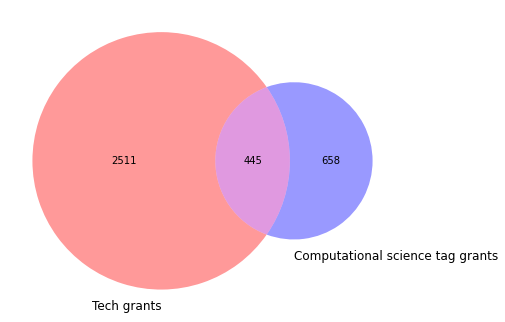

In [87]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
venn2([set(tech_grants), set(comp_grants)],
      set_labels = ('Tech grants', 'Computational science tag grants'), 
     set_colors = ['red','blue'])

## Trends in the computational science tagged grants in and out of the tech grant list

In [89]:
import numpy as np
tech_years = grant_data['Financial start Year'].value_counts().sort_index(ascending=True).to_dict()
comp_years = comp_grants_info['Start year'].value_counts().sort_index(ascending=True).to_dict()
all_years = set(tech_years.keys()).union(set(comp_years.keys()))
for year in all_years:
    if year not in tech_years:
        tech_years[year] = 0
    if year not in comp_years:
        comp_years[year] = 0
tech_years_prop = {k:v/sum(tech_years.values()) for k,v in tech_years.items()}
comp_years_prop = {k:v/sum(comp_years.values()) for k,v in comp_years.items()}

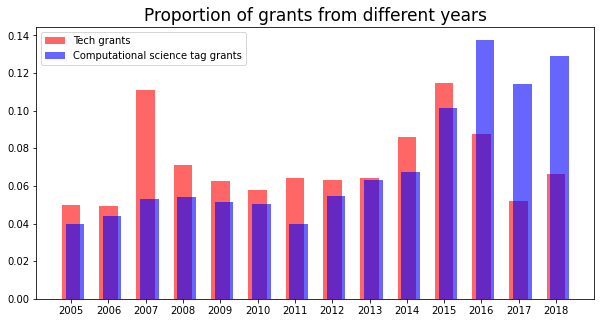

In [91]:
plt.figure(figsize = (10,5))
X = np.arange(len(tech_years_prop))
ax = plt.subplot(111)
ax.bar(X, tech_years_prop.values(), width=0.5, color='r', alpha = 0.6, align='center')
ax.bar(X+0.1, comp_years_prop.values(), width=0.5, color='b', alpha = 0.6, align='center')
ax.legend(('Tech grants', 'Computational science tag grants'))
plt.xticks(X, tech_years_prop.keys())
plt.title("Proportion of grants from different years", fontsize=17)
plt.show()

In [101]:
tech_granttype = grant_data['Grant Programme:Title'].value_counts().to_dict()
comp_granttype = comp_grants_info['Master Grant Type Scheme Name (Scheme)'].value_counts().to_dict()
all_granttype = set(tech_granttype.keys()).union(set(comp_granttype.keys()))
for granttype in all_granttype:
    if granttype not in tech_granttype:
        tech_granttype[granttype] = 0
    if granttype not in comp_granttype:
        comp_granttype[granttype] = 0
tech_granttype_prop = {k:v/sum(tech_granttype.values()) for k,v in tech_granttype.items()}
comp_granttype_prop = {k:v/sum(comp_granttype.values()) for k,v in comp_granttype.items()}

In [109]:
prop_threshold = 0.01
top_granttypes = set([k for k,v in tech_granttype_prop.items() if v>prop_threshold]).union(
    set([k for k,v in comp_granttype_prop.items() if v>prop_threshold]))

top_tech_granttype_prop = {k:v for k,v in tech_granttype_prop.items() if k in top_granttypes}
top_comp_granttype_prop = {k:v for k,v in comp_granttype_prop.items() if k in top_granttypes}

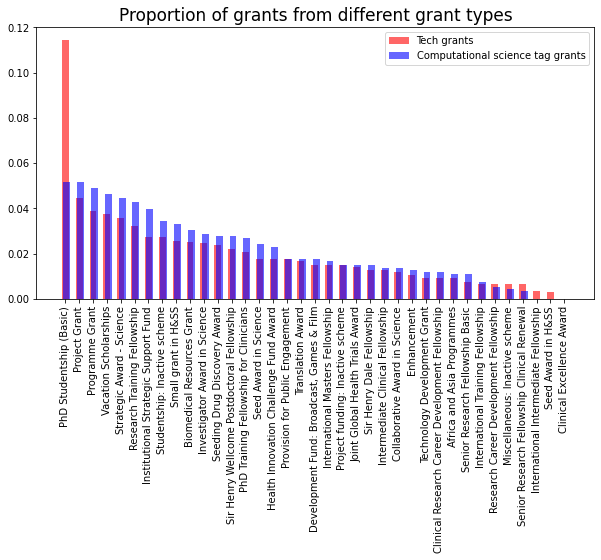

In [137]:
plt.figure(figsize = (10,5))
X = np.arange(len(top_tech_granttype_prop))
ax = plt.subplot(111)
ax.bar(X, top_tech_granttype_prop.values(), width=0.5, color='r', alpha = 0.6, align='center')
ax.bar(X+0.1, top_comp_granttype_prop.values(), width=0.5, color='b', alpha = 0.6, align='center')
ax.legend(('Tech grants', 'Computational science tag grants'))
plt.xticks(X, top_tech_granttype_prop.keys(), rotation=90)
plt.title("Proportion of grants from different grant types", fontsize=17)
plt.show()

In [133]:
tech_phd_years = grant_data.loc[grant_data['Grant Programme:Title'] == 'PhD Studentship (Basic)']['Financial start Year'].value_counts().sort_index(ascending=True).to_dict()
comp_phd_years = comp_grants_info.loc[comp_grants_info['Master Grant Type Scheme Name (Scheme)'] == 'PhD Studentship (Basic)']['Start year'].value_counts().sort_index(ascending=True).to_dict()
all_years = set(tech_phd_years.keys()).union(set(comp_phd_years.keys()))
for year in all_years:
    if year not in tech_phd_years:
        tech_phd_years[year] = 0
    if year not in comp_phd_years:
        comp_phd_years[year] = 0
tech_phd_years = {k:v/sum(tech_phd_years.values()) for k,v in tech_phd_years.items()}
comp_phd_years = {k:v/sum(comp_phd_years.values()) for k,v in comp_phd_years.items()}

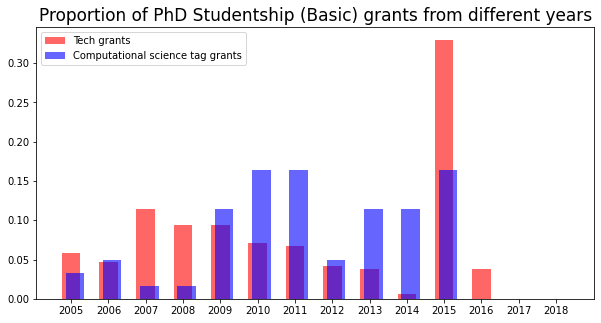

In [134]:
plt.figure(figsize = (10,5))
X = np.arange(len(tech_phd_years))
ax = plt.subplot(111)
ax.bar(X, tech_phd_years.values(), width=0.5, color='r', alpha = 0.6, align='center')
ax.bar(X+0.1, comp_phd_years.values(), width=0.5, color='b', alpha = 0.6, align='center')
ax.legend(('Tech grants', 'Computational science tag grants'))
plt.xticks(X, tech_phd_years.keys())
plt.title("Proportion of PhD Studentship (Basic) grants from different years", fontsize=17)
plt.show()